In [5]:
!pip install seaborn
!pip install plotly


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 24.0 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set(style="darkgrid")
plt.rcParams["figure.figsize"] = (8,5)

df = pd.read_csv("train.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Распределение признаков Survived, Pclass, Age, Sex, Parch

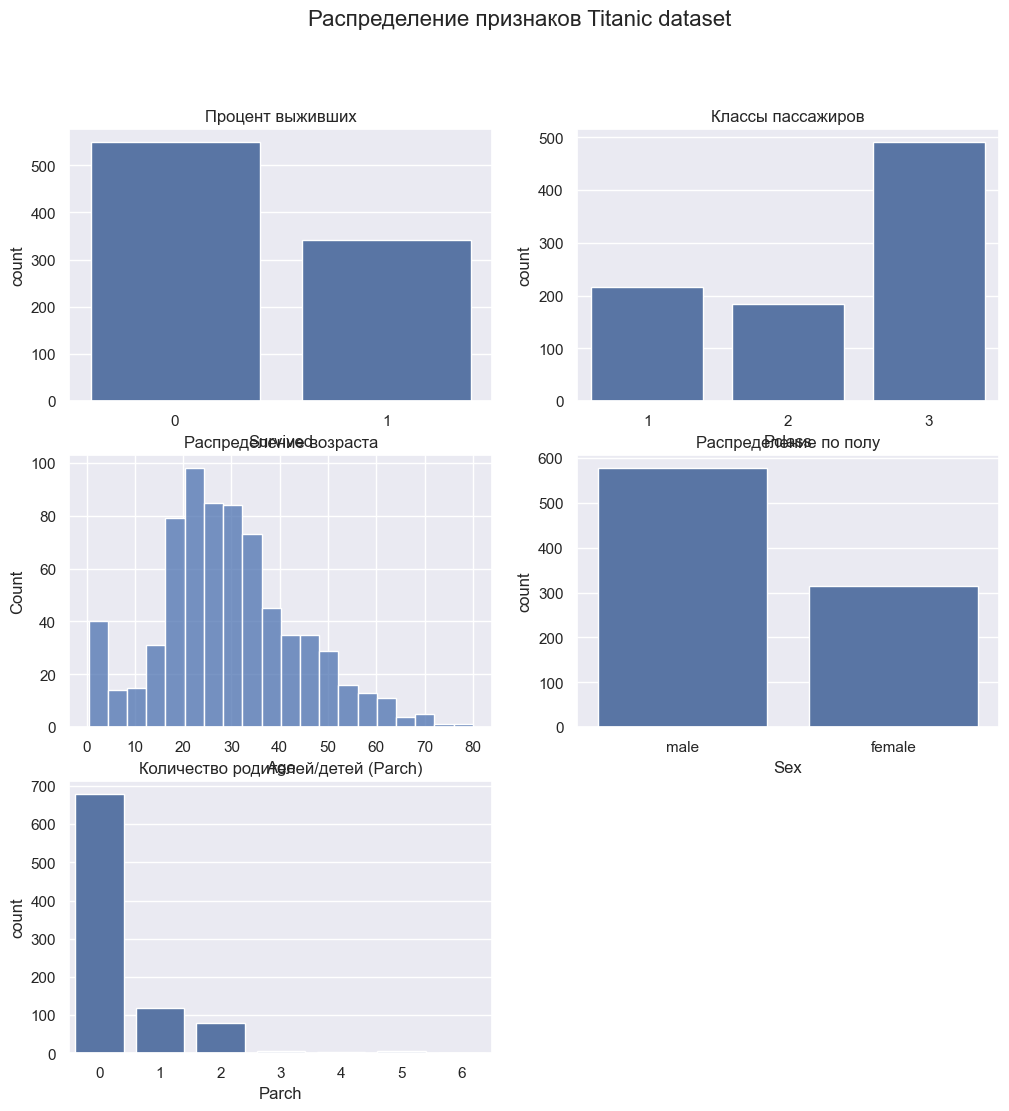

In [15]:
fig, axes = plt.subplots(3, 2, figsize=(12,12))
fig.suptitle("Распределение признаков Titanic dataset", fontsize=16)

sns.countplot(data=df, x="Survived", ax=axes[0,0])
axes[0,0].set_title("Процент выживших")

sns.countplot(data=df, x="Pclass", ax=axes[0,1])
axes[0,1].set_title("Классы пассажиров")

sns.histplot(data=df, x="Age", ax=axes[1,0])
axes[1,0].set_title("Распределение возраста")

sns.countplot(data=df, x="Sex", ax=axes[1,1])
axes[1,1].set_title("Распределение по полу")

sns.countplot(data=df, x="Parch", ax=axes[2,0])
axes[2,0].set_title("Количество родителей/детей (Parch)")

axes[2,1].axis("off")
plt.show()


Boxplot для возраста

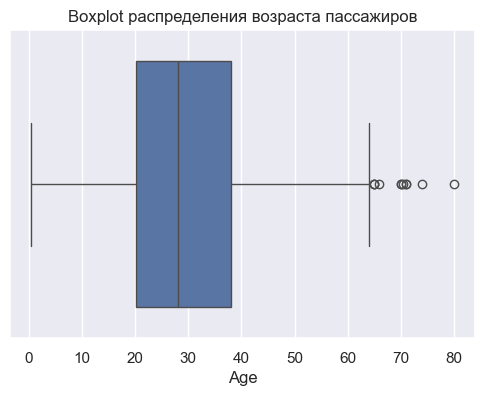

In [19]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="Age")
plt.title("Boxplot распределения возраста пассажиров")
plt.xlabel("Age")
plt.show()


Интерпретация — нижний ус находится около 0, верхний около 65. Основная часть пассажиров находилась в возрасте от 28 до 38 лет, медианный возраст 28. Есть выбросы, демонстрирующие наличие пожилых пассажиров старше 65 лет.

Pie Chart Survived

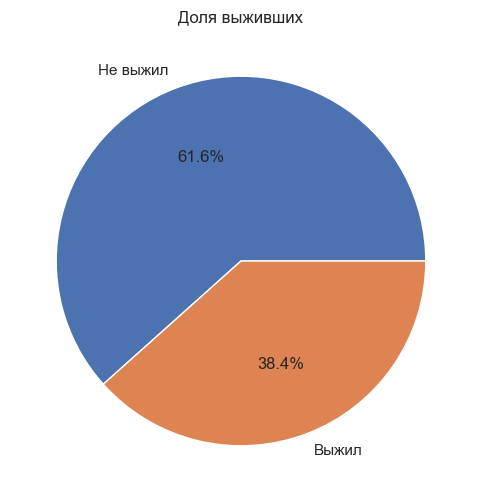

In [20]:
surv = df["Survived"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(surv, labels=["Не выжил","Выжил"], autopct="%1.1f%%")
plt.title("Доля выживших")
plt.show()


Pie Chart Pclass


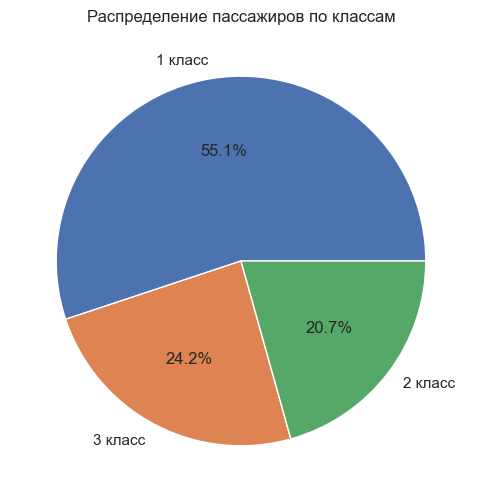

In [21]:
pcl = df["Pclass"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(pcl, labels=["1 класс","3 класс","2 класс"], autopct="%1.1f%%")
plt.title("Распределение пассажиров по классам")
plt.show()


Pairplot для всех числовых переменных

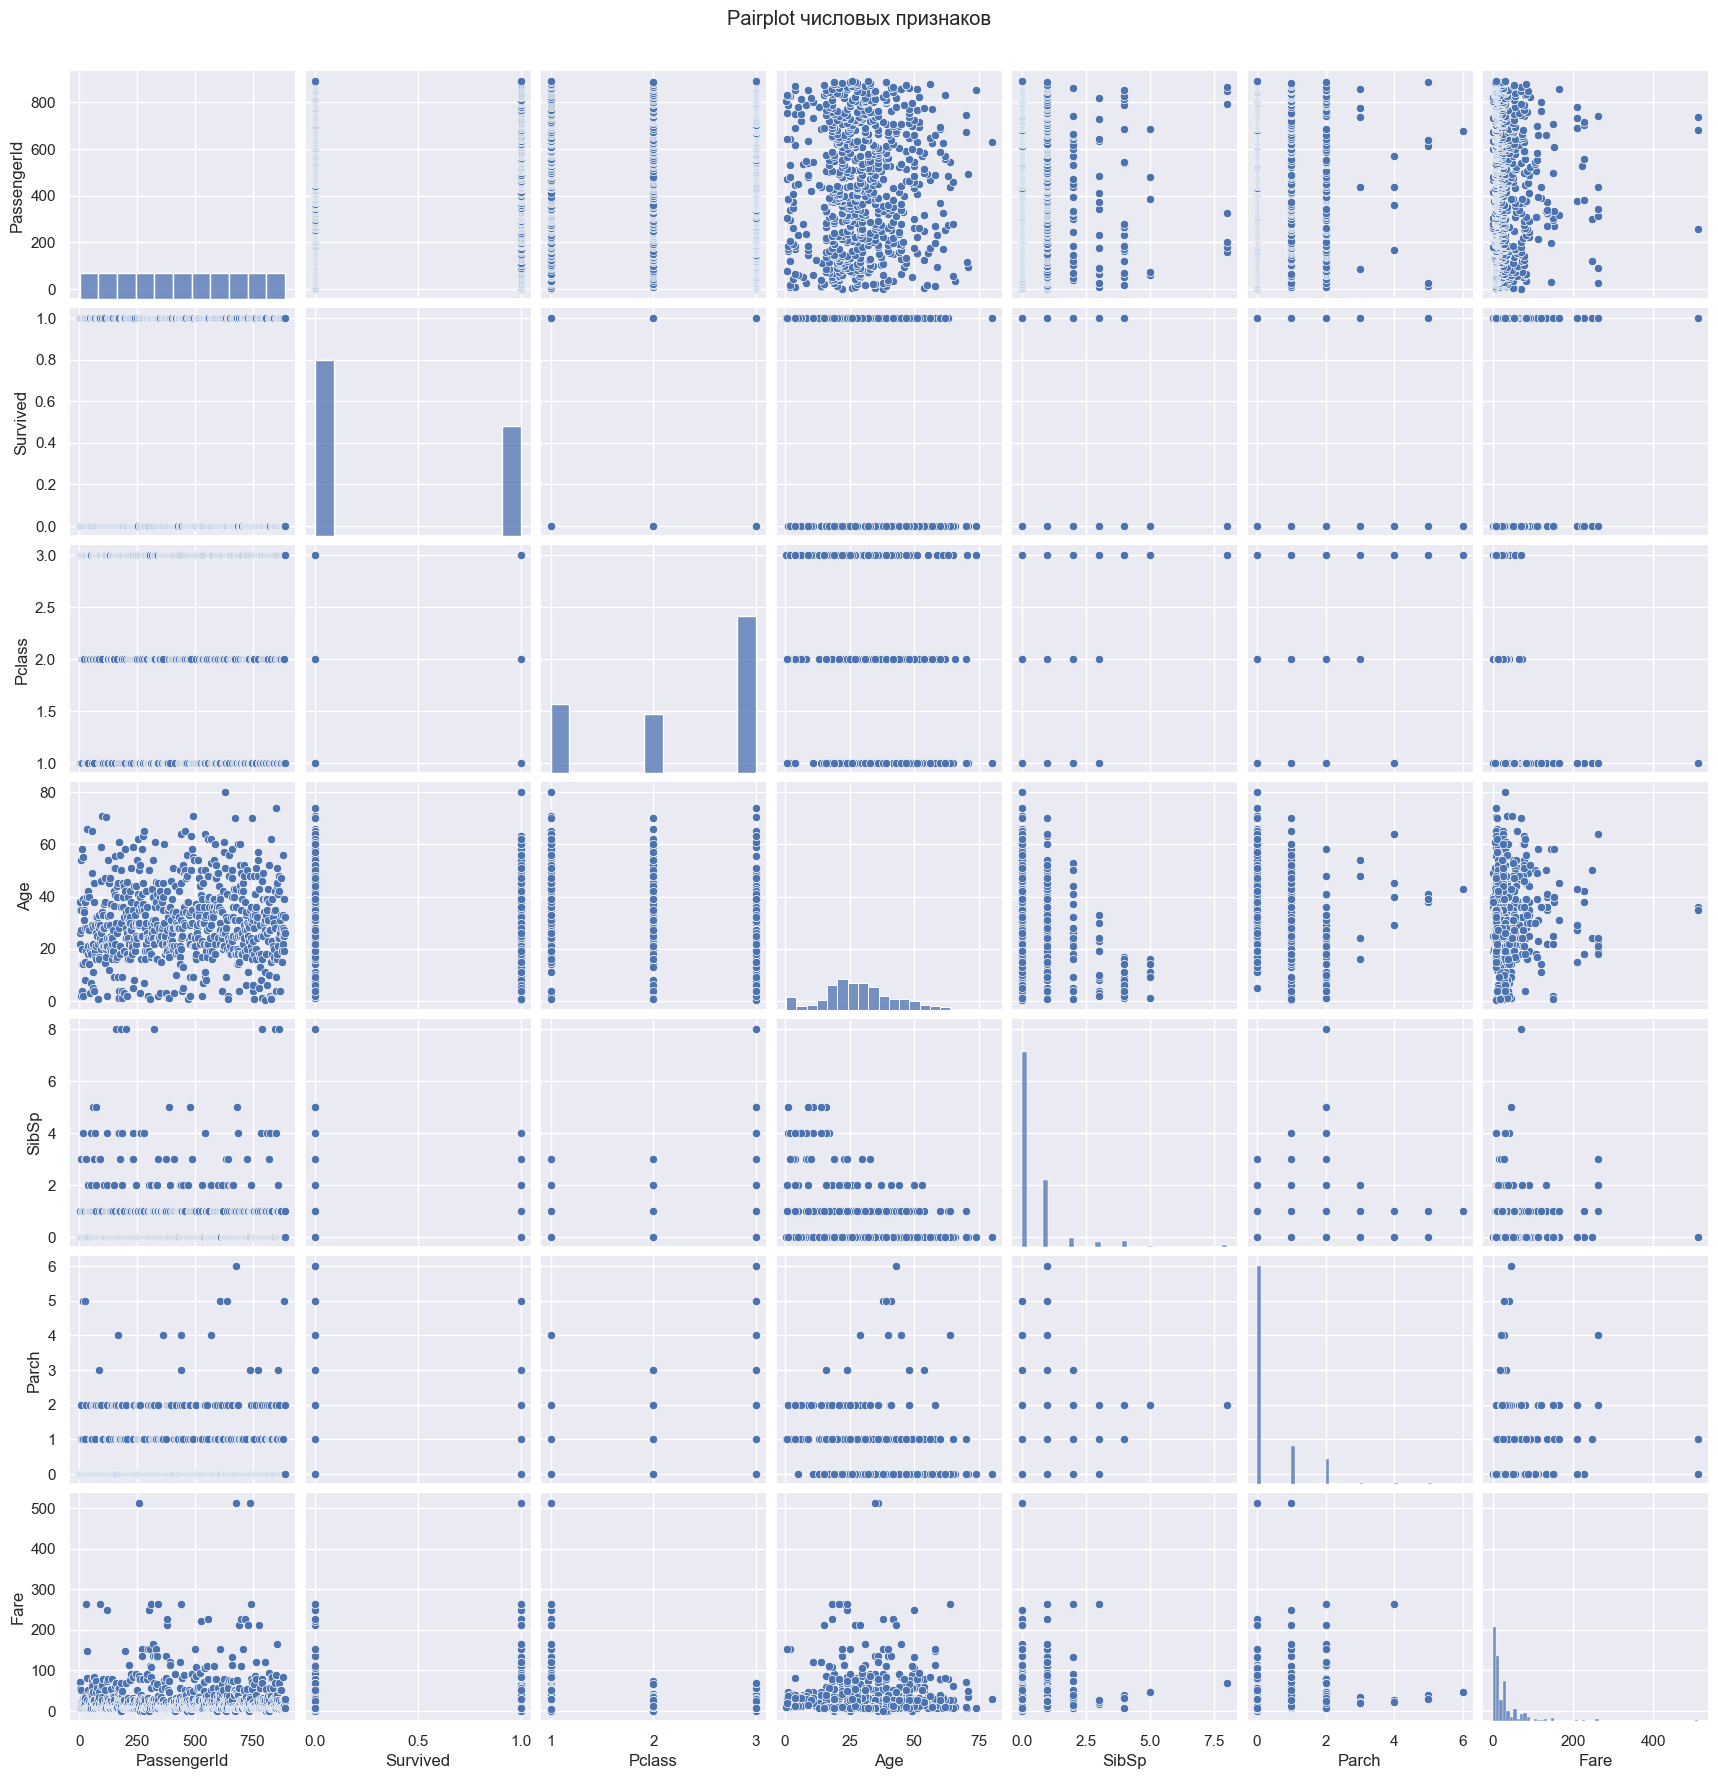

In [22]:
numeric_df = df.select_dtypes(include=["int64", "float64"])
sns.pairplot(numeric_df)
plt.suptitle("Pairplot числовых признаков", y=1.02)
plt.show()


Интерактивный sunburst plot

In [23]:
fig = px.sunburst(
    df,
    path=["Pclass", "Sex"],   # уровни иерархии
    values=None,              # количество объектов считаем сами
    title="Количество пассажиров по классу и полу"
)

fig.show()
